In [2]:
# get stationlist
# http://service.iris.edu/fdsnws/station/1/query?net=*&sta=*&loc=00&cha=LH?,BH*&starttime=2014-02-14T13:00:00&endtime=2015-05-15T00:00:00&level=channel&format=text&lat=67.5&lon=142.5&minradius=0.0&maxradius=30.0&includecomments=true&nodata=404
# generated by: http://service.iris.edu/fdsnws/station/docs/1/builder/
# The above generates a list of station names and channel names.
# The equivilent can be generated in Python, I think. However until then, we'll use a text file.
#
%matplotlib inline
import obspy
import os
from obspy.clients.fdsn import Client
from obspy.clients.fdsn import RoutingClient
from obspy import UTCDateTime
from obspy import read_inventory
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

#client = Client("IRIS",timeout=240)

2024.315.164950.LM.NHBP.00.HHE..mseed
2024.315.164950.LM.NHBP.00.HHN..mseed
2024.315.164950.LM.NHBP.00.HHZ..mseed
               network: LM
               station: NHBP
              location: 00
               channel: HHE
             starttime: 2024-11-10T16:49:50.000000Z
               endtime: 2024-11-10T17:15:00.000000Z
         sampling_rate: 100.0
                 delta: 0.01
                  npts: 151001
                 calib: 1.0
_fdsnws_dataselect_url: http://service.iris.edu/fdsnws/dataselect/1/query
               _format: MSEED
                 mseed: AttribDict({'dataquality': 'M', 'number_of_records': 434, 'encoding': 'STEIM1', 'byteorder': '>', 'record_length': 512, 'filesize': 648704})
            processing: ['ObsPy 1.4.1: trim(endtime=UTCDateTime(2024, 11, 10, 17, 15)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2024, 11, 10, 16, 49, 50))', "ObsPy 1.4.1: filter(options={'freqmin': 0.05, 'freqmax': 5}::type='bandpass')"]


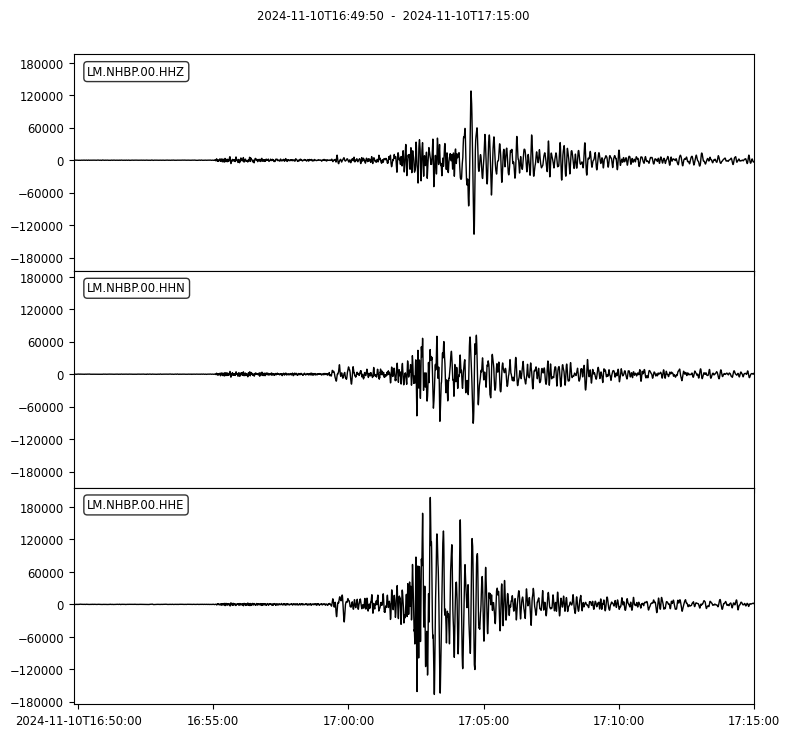

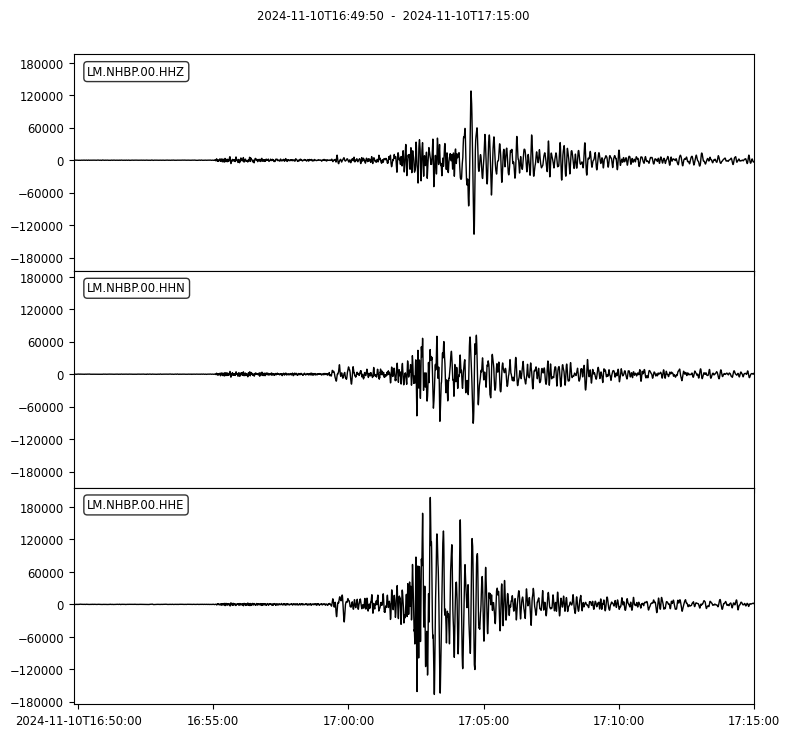

In [6]:
from obspy.clients.fdsn import Client
from obspy.clients.fdsn import RoutingClient
from obspy import UTCDateTime
from obspy import read_inventory
#client = RoutingClient("iris-federator")
client = Client("IRIS")
#
# Put your start time and endtime here, along inputs for the stations you want for your files.
#
#starttime = UTCDateTime("2024-11-13T17:25:00.000") # Create the UTCdatetime that Obspy needs for retrieving data segments
#endtime = UTCDateTime("2024-11-13T17:30:00.000") # Create the UTCdatetime that Obspy needs for retrieving data segments
#[network,station,location,channel,pretrigger,posttrigger] = ["LM","NHBP","00","HH*",0,1800] # specify parameters for data retrieval
#[network,station,location,channel,pretrigger,posttrigger] = ["II","AAK","00","BH*",0,1800] # specify parameters for data retrieval
starttime = UTCDateTime("2024-11-10T16:49:50.00")
endtime = UTCDateTime("2024-11-10T17:15:00.00")
#[network,station,location,channel,pretrigger,posttrigger] = ["AU","AS31","--","*",0,7200] # specify parameters for data retrieval
#[network,station,location,channel,pretrigger,posttrigger] = ["SC","Y22D","","HH*",0,43200] # specify parameters for data retrieval
#[network,station,location,channel,pretrigger,posttrigger] = ["N4","L46A","00","HH*",0,240] # specify parameters for data retrieval
#[network,station,location,channel,pretrigger,posttrigger] = ["N4","M50A","00","HH*",0,240] # specify parameters for data retrieval#
#[network,station,location,channel,pretrigger,t2] = ["LM","NHBP","D0","VM*",0,144000] # specify parameters for data retrieval
[network,station,location,channel,pretrigger,t2] = ["LM","NHBP","00","HH*",0,3600] # specify parameters for data retrieval
#[network,station,location,channel,pretrigger,posttrigger] = ["N4","L46A","??","HH*",0,3600] # specify parameters for data retrieval
#[network,station,location,channel,pretrigger,t2] = ["N4","J47A","32","BDF",0,3600] # specify parameters for data retrieval
#[network,station,location,channel,pretrigger,t2] = ["N4","I49A","00","BHZ",0,3600] # specify parameters for data retrieval
#[network,station,location,channel,pretrigger,posttrigger] = ["N4","L46A","??","HH*",0,3600] # specify parameters for data retrieval
#[network,station,location,channel,pretrigger,t2] = ["N4","J47A","??","HH*",0,3600] # specify parameters for data retrieval
#[network,station,location,channel,pretrigger,t2] = ["N4","K50A","??","HH*",0,3600] # specify parameters for data retrieval
#[network,station,location,channel,pretrigger,t2] = ["N4","M50A","??","HH*",0,3600] # specify parameters for data retrieval
#[network,station,location,channel,pretrigger,t2] = ["N4","E46A","??","HH*",0,3600] # specify parameters for data retrieval
#[network,station,location,channel,pretrigger,t2] = ["N4","I49A","??","HH*",0,3600] # specify parameters for data retrieval
#[network,station,location,channel,pretrigger,t2] = ["N4","N47A","??","HH*",0,3600] # specify parameters for data retrieval
#[network,station,location,channel,pretrigger,t2] = ["N4","N49A","??","HH*",0,3600] # specify parameters for data retrieval


#inventory = client.get_stations(network=network, station=station,location = location,channel = channel,
#                                starttime=t,
#                                endtime=t+posttrigger,
#                                level = "response")

st = client.get_waveforms(network,station,location,channel,starttime,endtime) #,attach_response=True) # get streams.
st.merge(fill_value = 0)



for s in st:
#        starttime =str(s.stats.starttime.julday)+"."+str(float(s.stats.starttime.hour):02.0f)+str(float(s.stats.starttime.minute):02.0f)+str(float(s.stats.starttime.second):02.0f)
        starttime = str(f"{s.stats.starttime.year}.{s.stats.starttime.julday}.{float(s.stats.starttime.hour):02.0f}{float(s.stats.starttime.minute):02.0f}{float(s.stats.starttime.second):02.0f}")
        filename = starttime+"."+s.stats.network+"."+s.stats.station+"."+s.stats.location+"."+s.stats.channel+"."+".mseed"
        print(filename)
        s.write(os.path.join("D:\\seismo\\",filename), format="mseed")
        
st.filter('bandpass',freqmin=0.05,freqmax=5)
############## At this point we should have three streams in st. st[0] = BHE st[1] = BHN st[2] = BHZ  ###############
#outfile = "D:\Seismo\LM.NE8K.20220719T0130.mseed"
#st.write(outfile, format="MSEED")
print(st[0].stats)        # st[2] = BHZ component stream
st.plot()

In [7]:

#st.plot()  48.40 / 28.175 = 1.718 Vp/Vs for crustal structure at origin.  1245.4/684.1 = 1.82 overall travel time.

In [ ]:
print(inventory)
inventory.write('D:/seismo/my_inventory.xml', format='STATIONXML')  
outfile = "D:/seismo/LM_NE8K_10_02_06_20_00.mseed"
st.write(outfile,format="MSEED")

In [ ]:
%matplotlib qt
st.plot()

rt1 = st[2].copy() # make a copy of the vertical waveform
rt1.remove_response(inventory=inventory,output='VEL') # plot velocity in red
rt1.filter('bandpass', freqmin=.05, freqmax=16.0,corners=3, zerophase=True)
rt1.plot(color = 'red')


rt2 = st[2].copy() # make a copy of the vertical waveform
rt2.remove_response(inventory=inventory,output='ACC') # plot acceleration in blue
rt2.filter('bandpass', freqmin=.05, freqmax=16.0,corners=3, zerophase=True)
rt2.plot(color = 'blue')

rt3 = st[2].copy() # make a copy of the vertical waveform
rt3.remove_response(inventory=inventory,output='DISP') # plot displacement in green
rt3.filter('bandpass', freqmin=.05, freqmax=16.0,corners=3, zerophase=True)
rt3.plot(color = 'green')
rt3.stats

In [ ]:
amplitude = rt1.data        # Place the vertical channel time-history of displacmenet into a list.
delta = rt1.stats.delta     # This is the sample period for the channel
numpoints = rt1.stats.npts  # This is the number of points within the stream

freqscale = np.linspace(0.0, 1/(2*delta), int(numpoints/2))  # frequency scale half of the data samples you have
amplitude_fft = fft(amplitude)                                   #Fourier transform
amp_fft_real = 2/numpoints * np.abs(amplitude_fft[0:np.int(numpoints/2)]) * 1E+09  #Get only real values of the amplitude
# spectrum is multipled by 1E+09 to convert from meters to nanometers
#                        Plotting the FFT of the waveform
plt.figure(figsize=(6,5))
plt.plot(freqscale, amp_fft_real, 'r')
plt.grid(b=True, which='both' )
plt.title('Single-sided Amplitude Spectrum ', size=14)
plt.xlabel('f(Hz)', size=14)
plt.ylabel('Amplitude spectrum (nanometers/sec)', size=14)
plt.xscale('log')
plt.yscale('log')
plt.xlim(freqscale[1], freqscale[-1])
plt.ylim(min(amp_fft_real), 10**5)

In [ ]:
amplitude = rt2.data        # Place the vertical channel time-history of displacmenet into a list.
delta = rt2.stats.delta     # This is the sample period for the channel
numpoints = rt2.stats.npts  # This is the number of points within the stream

freqscale = np.linspace(0.0, 1/(2*delta), int(numpoints/2))  # frequency scale half of the data samples you have
amplitude_fft = fft(amplitude)                                   #Fourier transform
amp_fft_real = 2/numpoints * np.abs(amplitude_fft[0:np.int(numpoints/2)]) * 1E+09  #Get only real values of the amplitude
# spectrum is multipled by 1E+09 to convert from meters to nanometers
#                        Plotting the FFT of the waveform
plt.figure(figsize=(6,5))
plt.plot(freqscale, amp_fft_real, 'b')
plt.grid(b=True, which='both' )
plt.title('Single-sided Amplitude Spectrum ', size=14)
plt.xlabel('f(Hz)', size=14)
plt.ylabel('Amplitude spectrum (nanometers/sec^2)', size=14)
plt.xscale('log')
plt.yscale('log')
plt.xlim(freqscale[1], freqscale[-1])
plt.ylim(min(amp_fft_real), 10**5)

In [ ]:
amplitude = rt3.data        # Place the vertical channel time-history of displacmenet into a list.
delta = rt3.stats.delta     # This is the sample period for the channel
numpoints = rt3.stats.npts  # This is the number of points within the stream

freqscale = np.linspace(0.0, 1/(2*delta), int(numpoints/2))  # frequency scale half of the data samples you have
amplitude_fft = fft(amplitude)                                   #Fourier transform
amp_fft_real = 2/numpoints * np.abs(amplitude_fft[0:np.int(numpoints/2)]) * 1E+09  #Get only real values of the amplitude
# spectrum is multipled by 1E+09 to convert from meters to nanometers
#                        Plotting the FFT of the waveform
plt.figure(figsize=(6,5))
plt.plot(freqscale, amp_fft_real, 'g')
plt.grid(b=True, which='both' )
plt.title('Single-sided Amplitude Spectrum ', size=14)
plt.xlabel('f(Hz)', size=14)
plt.ylabel('Amplitude spectrum (nanometers)', size=14)
plt.xscale('log')
plt.yscale('log')
plt.xlim(freqscale[1], freqscale[-1])
plt.ylim(min(amp_fft_real), 10**5)

In [ ]:
def loadstations(stationlist):
    with open(stationlist,'r') as fin:
        list = csv.reader(fin)
        rowcnt = 0
        data = []
        for row in list:
           # print row
            data.append(row)
                
        return(data)

In [ ]:
# Go grab a discrete piece of data.
client = Client()
#dt = UTCDateTime("2024-03-05T12:12:00.000")
dt = UTCDateTime("2024-10-05T19:15:33.0")
#           ["LM","NE8K","00",["HHN","HHE","HHZ"]], \
Stations =  [["A2","AGVN","00",["HHN","HHE","HHZ"]], \
            ["A2","ARZK","00",["HHN","HHE","HHZ"]], \
            ["A2","KCHK","00",["HHN","HHE","HHZ"]], \
            ["A2","LRNG","00",["HHN","HHE","HHZ"]], \
            ["A2","SHMT","00",["HHN","HHE","HHZ"]], \
            ["A2","SVZR","00",["HHN","HHE","HHZ"]], \
            ["A2","TTJR","00",["HHN","HHE","HHZ"]], \
            ["N4","M50A","00",["HH1","HH2","HHZ"]], \
            ["N4","N47A","00",["HH1","HH2","HHZ"]], \
            ["N4","N49A","00",["HH1","HH2","HHZ"]], \
            ["N4","N51A","00",["HH1","HH2","HHZ"]], \
            ["N4","O49A","00",["HH1","HH2","HHZ"]], \
            ["N4","SFIN","00",["HH1","HH2","HHZ"]], \
            ["NW","L44A","00",["HH1","HH2","HHZ"]], \
            ["OH","BCOH","--",["HHN","HHE","HHZ"]], \
            ["OH","BGOH","10",["HHN","HHE","HHZ"]], \
            ["OH","BSPO","--",["HHN","HHE","HHZ"]], \
            ["OH","CHWO","--",["HHN","HHE","HHZ"]], \
            ["OH","CPOH","--",["HHN","HHE","HHZ"]], \
            ["OH","DSFO","10",["HHN","HHE","HHZ"]], \
            ["OH","KDOH","--",["HHN","HHE","HHZ"]], \
            ["OH","KIOH","10",["HHN","HHE","HHZ"]], \
            ["OH","KLOH","--",["HHN","HHE","HHZ"]], \
            ["OH","KLSO","--",["HHN","HHE","HHZ"]], \
            ["OH","MWLO","--",["HHN","HHE","HHZ"]], \
            ["OH","SSPO","--",["HHN","HHE","HHZ"]], \
            ["OH","P51A","--",["HHN","HHE","HHZ"]], \
            ["OH","VLOH","--",["HHN","HHE","HHZ"]], \
            ["OH","SLSO","--",["HHN","HHE","HHZ"]]]
# Stations = [ \
#            ["OH","KLSO","--",["HHN","HHE","HHZ"]], \
#            ["OH","VLOH","10",["HHN","HHE","HHZ"]], \
#            ["OH","SLSO","--",["HHN","HHE","HHZ"]]]
for station in Stations:
    channels = station[3]
    for channel in channels:
        try:
            st = client.get_waveforms(station[0], station[1], station[2], channel,dt,dt+(900))
                #data = client.resp("N4", "L48A", "--", "BHZ", dt, filename="C:\\SR\\Stationdata\\N4.J47A.BHZ.resp")
            starttime = f"{dt.year}.{dt.month}.{dt.day}.{dt.hour}.{dt.minute}.{dt.second}"
            outfile = f"C:/Seismo/{station[0]}.{station[1]}.{station[2]}.{channel}.{starttime}.mseed"
            st.write(outfile,format="mseed")
            print(f"{outfile} written to disk.")
        except:   
           print(f"No data available for {station[0]}.{station[1]}.{station[2]}.{channel} at {dt}")

In [ ]:
# Go grab a discrete piece of data.
client = Client()
#dt = UTCDateTime("2024-03-05T12:12:00.000")
#dt = UTCDateTime("2024-10-05T19:15:33.0")
outfolder = "20150907T133506"
dt = UTCDateTime("2015-09-07T13:35:06")
#outfolder = "20151227T113222"
#dt = UTCDateTime("2015-12-27T11:32:22")
#outfolder = "20171021T230054"
#dt = UTCDateTime("2017-10-21T23:00:54")
#           ["LM","NE8K","00",["HHN","HHE","HHZ"]], \
Stations =  [["A2","AGVN","00",["HHN","HHE","HHZ"]], \
             ["A2","ARZK","00",["HHN","HHE","HHZ"]], \
             ["A2","KCHK","00",["HHN","HHE","HHZ"]], \
             ["A2","LRNG","00",["HHN","HHE","HHZ"]], \
             ["A2","SHMT","00",["HHN","HHE","HHZ"]], \
             ["A2","SVZR","00",["HHN","HHE","HHZ"]], \
             ["A2","TTJR","00",["HHN","HHE","HHZ"]], \
             ["A2","ZRSH","00",["HHN","HHE","HHZ"]], \
             ["AB","HASN","00",["HHN","HHE","HHZ"]], \
             ["AB","KHDR","00",["HHN","HHE","HHZ"]], \
             ["AB","MV01","00",["HHN","HHE","HHZ"]], \
             ["AB","MV02","00",["HHN","HHE","HHZ"]], \
             ["AB","MV04","00",["HHN","HHE","HHZ"]], \
             ["AB","MV05","00",["HHN","HHE","HHZ"]], \
             ["AB","MV06","00",["HHN","HHE","HHZ"]], \
             ["AB","MV07","00",["HHN","HHE","HHZ"]], \
             ["AB","MV08","00",["HHN","HHE","HHZ"]], \
             ["AB","MV09","00",["HHN","HHE","HHZ"]], \
             ["AB","MV10","00",["HHN","HHE","HHZ"]], \
             ["AB","MV11","00",["HHN","HHE","HHZ"]], \
             ["AB","MV12","00",["HHN","HHE","HHZ"]], \
             ["AB","PRLH","00",["HHN","HHE","HHZ"]], \
             ["AB","SHUR","00",["HHN","HHE","HHZ"]], \
             ["AB","TELL","00",["HHN","HHE","HHZ"]], \
             ["AB","TOVZ","00",["HHN","HHE","HHZ"]], \
             ["AB","YLVJ","00",["HHN","HHE","HHZ"]], \
             ["AB","ZRNV","00",["HHN","HHE","HHZ"]], \
             ["AB","TELL","00",["HHN","HHE","HHZ"]], \
             ["GO","AKH","--",["HHN","HHE","HHZ"]], \
             ["GO","BGD","--",["HHN","HHE","HHZ"]], \
             ["GO","DDFL","--",["HHN","HHE","HHZ"]], \
             ["GO","DGRG","--",["HHN","HHE","HHZ"]], \
             ["GO","GUDG","--",["HHN","HHE","HHZ"]], \
             ["GO","SEAG","--",["HHN","HHE","HHZ"]], \
             ["GO","TBLG","--",["HHN","HHE","HHZ"]], \
             ["GO","TRLG","--",["HHN","HHE","HHZ"]], \
             ["GO","AZNN","00",["HHN","HHE","HHZ"]], \

             ["GO","DALI","00",["HHN","HHE","HHZ"]], \
             ["GO","DSHG","00",["HHN","HHE","HHZ"]], \
             ["GO","DVRK","00",["HHN","HHE","HHZ"]], \
             ["GO","EMLK","00",["HHN","HHE","HHZ"]], \
             ["GO","MTAG","00",["HHN","HHE","HHZ"]], \
             ["GO","SHNK","00",["HHN","HHE","HHZ"]], \
             ["IU","GNI","00",["BH1","BH2","BHZ"]], \
             ["KO","KARS","--",["HHN","HHE","HHZ"]], \
             ["KO","GURO","--",["HHN","HHE","HHZ"]], \
             ["KO","SIRT","--",["HHN","HHE","HHZ"]], \
             ["MP","BGD1","00",["HHN","HHE","HHZ"]], \
             ["MP","BSR2","00",["HHN","HHE","HHZ"]], \
             ["MP","DYL1","00",["HHN","HHE","HHZ"]], \
             ["MP","KUT1","00",["HHN","HHE","HHZ"]]]

for station in Stations:
    channels = station[3]
    for channel in channels:
        try:
            st = client.get_waveforms(station[0], station[1], station[2], channel,dt,dt+(900))
                #data = client.resp("N4", "L48A", "--", "BHZ", dt, filename="C:\\SR\\Stationdata\\N4.J47A.BHZ.resp")
            starttime = f"{dt.year}.{dt.month}.{dt.day}.{dt.hour}.{dt.minute}.{dt.second}"
            outfile = f"C:/Seismo/{outfolder}/{station[0]}.{station[1]}.{station[2]}.{channel}.{starttime}.mseed"
            st.write(outfile,format="mseed")
            print(f"{outfile} written to disk.")
        except:   
           print(f"No data available for {station[0]}.{station[1]}.{station[2]}.{channel} at {dt}")

In [ ]:

dt = UTCDateTime("2018-07-16T16:00:00.000")
st = client.get_waveforms("N4", "J47A", "--", "BHZ",dt,dt+(60*120))
#data = client.resp("N4", "L48A", "--", "BHZ", dt, filename="C:\\SR\\Stationdata\\N4.J47A.BHZ.resp")
outfile = "D:/seismo/"
st.write(outfile+"N4"+"_J47A"+"_BHZ"+"_2018_07_16_16_00_00.mseed",format="mseed")


In [ ]:
st.write("C:/seismo/AAK.mseed",format="mseed")

In [ ]:
starttime = UTCDateTime("2002-01-01")
endtime = UTCDateTime("2002-01-02")
cat = client.get_events(starttime=starttime, endtime=endtime,
                        minmagnitude=6, catalog="ISC")

In [ ]:
from obspy import read_events

cat = client.get_events(starttime = UTCDateTime("2015-05-02T16:15:00"),endtime = UTCDateTime("2015-05-02T16:30:00"),minmagnitude = 4.0)
print(cat)
print(cat.events[0]['event_descriptions'])
print(cat.events[0]['origins'])

In [ ]:
cat.events[0]

In [ ]:
print(cat[16]['event'])
print(cat[16])
print (cat[16]['picks'])
print (cat[16].magnitudes)

In [ ]:
t = UTCDateTime("2016-09-09T09:00:00.000") # Create the UTCdatetime that Obspy needs for retrieving data segments

[network,station,location,channel,pretrigger,posttrigger] = ["ZV","WKZ10","--","HH*",0,960] # specify parameters for data retrieval

inventory = client.get_stations(network=network, station=station,location = location,channel = channel,
                                starttime=t-14400,
                                endtime=t+14400,
                               level = "response")

In [ ]:
inventory.write('c:/seismo/ZV_WKZ10.xml', format='STATIONXML')